# Using k-means

## Import packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [9]:
clients = pd.read_csv('clientSegmentation.csv')
clients.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Wrangling

### Drop columns

In [10]:
clientsTrimmed = clients.drop(['CustomerID', 'Gender'], axis=1)

In [11]:
clientsTrimmed.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## k-Means Analysis

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(clientsTrimmed)

KMeans(n_clusters=3)

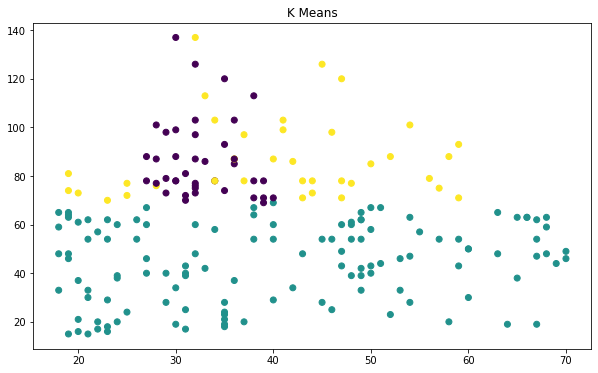

In [22]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(clientsTrimmed['Age'], clientsTrimmed['Annual Income (k$)'], c=kmeans.labels_, cmap='viridis')

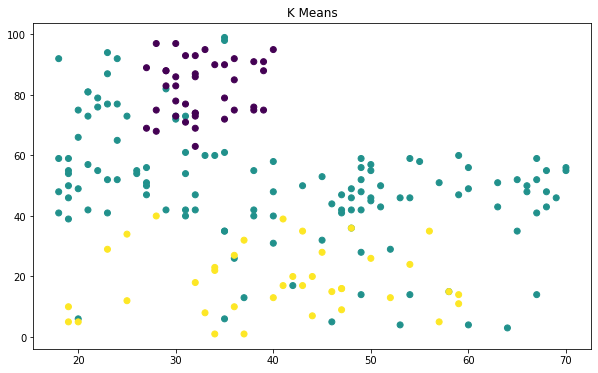

In [23]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(clientsTrimmed['Age'], clientsTrimmed['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')

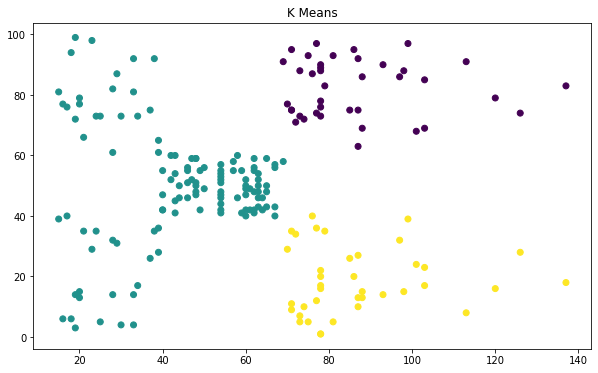

In [24]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(clientsTrimmed['Annual Income (k$)'], clientsTrimmed['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')

### Add Labels to the dataset

In [25]:
clientsTrimmed['Category'] = kmeans.labels_

In [26]:
clientsTrimmed.head()

,Age,Annual Income (k$),Spending Score (1-100),Category
0,19,15,39,1
1,21,15,81,1
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [27]:
clientsTrimmed.Category.value_counts()

1    123
0     39
2     38
Name: Category, dtype: int64

### Investigate Means by Category

In [28]:
clientsTrimmed.groupby('Category')['Age'].mean()

Category
0    32.692308
1    40.325203
2    40.394737
Name: Age, dtype: float64

In [29]:
clientsTrimmed.groupby('Category')['Annual Income (k$)'].mean()

Category
0    86.538462
1    44.154472
2    87.000000
Name: Annual Income (k$), dtype: float64

In [30]:
clientsTrimmed.groupby('Category')['Spending Score (1-100)'].mean()

Category
0    82.128205
1    49.829268
2    18.631579
Name: Spending Score (1-100), dtype: float64